# Random Forest

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

In [2]:
# Cargar datos
df = pd.read_csv("../data/ds_tradicional.csv")  

# Separar características y etiquetas
X = df.drop(columns=["class"])  
y = df["class"]

In [3]:
print("Shape: ", X.shape)
X.head(5) v                                                                        

Shape:  (1500, 1068)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_990,tfidf_991,tfidf_992,tfidf_993,tfidf_994,tfidf_995,tfidf_996,tfidf_997,tfidf_998,tfidf_999
0,0.228357,-0.070992,0,0,0,0,0,1.156945,0.351792,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.552379,-1.633707,0,0,0,0,0,-0.336615,-1.133639,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.465828,-0.294237,3,2,0,0,0,0.783555,0.945964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.318903,0.152253,0,0,0,1,0,1.754369,0.648878,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.797830,-0.740727,0,0,0,1,0,-1.307429,0.945964,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=22,
    stratify=y
)

In [5]:
rf = RandomForestClassifier(random_state=22)

In [14]:
param_grid = {
    'n_estimators': [500, 500, 700, 800],
    'max_depth': [None, 2, 4, 6, 8],
    'min_samples_split': [3, 4, 5, 6],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [15]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

In [16]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

In [17]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             error_score='raise',
             estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [5], 'n_estimators': [700]},
             scoring='roc_auc', verbose=1)

In [21]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 700}

In [25]:
best_randomforest = RandomForestClassifier(
    n_estimators = 700,
    criterion = 'entropy',
    max_depth = None,
    max_features = 'log2',
    min_samples_leaf = 1,
    min_samples_split = 5,
    random_state = 22
)

best_randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=5, n_estimators=700, random_state=22)

In [26]:
y_pred = best_randomforest.predict(X_val)
y_proba = best_randomforest.predict_proba(X_val)[:, 1]

In [27]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84       139
           1       0.84      0.92      0.88       161

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



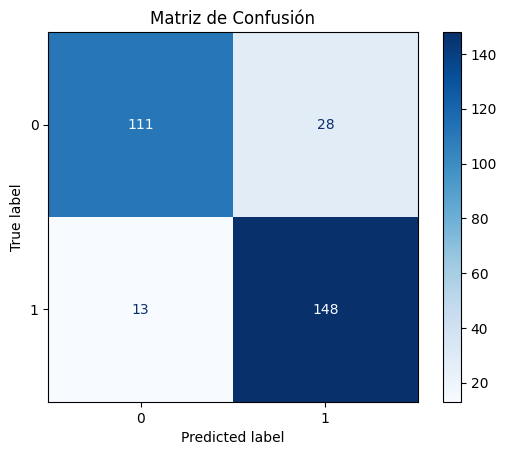

In [28]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

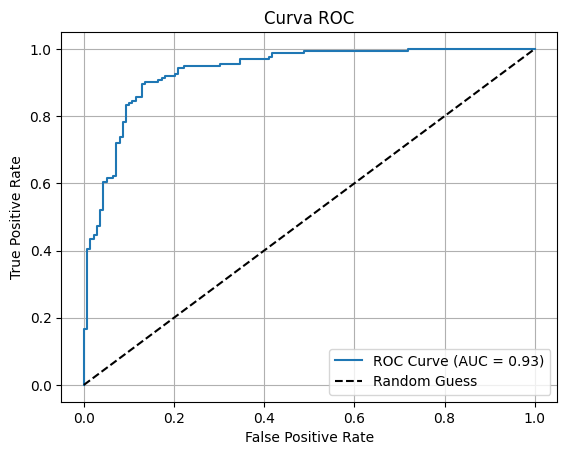

In [29]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
auc_score = roc_auc_score(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [31]:
fpr_value = 28 / (28 + 111)
tpr_value = 148 / (148 + 13)

print(f"AUC: {(auc_score * 100):.4f}%")
print(f"FPR: {(fpr_value * 100):.4f}%")
print(f"TPR: {(tpr_value * 100):.4f}%")

AUC: 93.4001%
FPR: 20.1439%
TPR: 91.9255%
